# NetworkX basics

In this guide you'll learn how to:

- differentiate **NetworkX graph types**,
- create a graph by **generating** it, **reading** it or **adding** nodes and edges,
- **remove** nodes and edges from the graph,
- **examine** a graph,
- **write** a graph to a file.

## NetworkX graph types

The model of the graph structure in NetworkX is similar to the labeled-property graph. Regarding the naming convention, relationships are called edges, and properties are called attributes in NetworkX. You can use the following NetworkX graph classes:

![networkx-graph-types](https://networkx.guide/assets/images/networkx-graph-types-cf81549883bb93cd4b558d22ceb8a27a.png)

## Graph creation

NetworkX graph objects can be created in three ways:

- using the **graph generators** - standard algorithms to create network topologies,
- by **reading** from different formats,
- by **adding nodes and edges** explicitly.

It is also possible to **remove nodes and edges** from your graph.

### Graph generators

There are many types of graph generators inside NetworkX. They create predefined network structures, so that you can continue on exploring it and learning more about graph algorithms. Some of the most often used generators are:

- `balanced_tree()`
- `complete_graph()`
- `cycle_graph()`
- `star_graph()`
- `karate_club_graph()`

**Example:**

Let's generate and draw Zachary’s Karate Club graph with the following Python code:

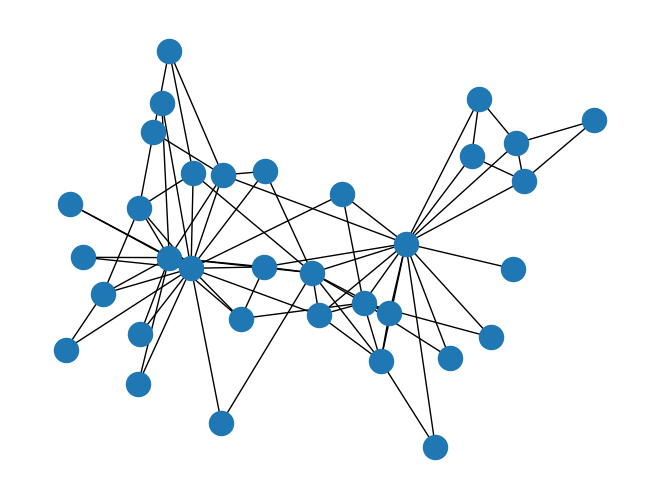

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


generated_graph = nx.karate_club_graph()
pos = nx.spring_layout(generated_graph, scale=0.5)
nx.draw(generated_graph, pos)

plt.show()

<div class="alert alert-block alert-warning">
<b>MEMORY ISSUES:</b> This kind of graph creation is good enough for testing, but be careful, since each time you start your script, the data has to be loaded in-memory. To learn more about it, head over to our FAQ.
</div>

### Reading graphs

Data can be imported from many different sources and file formats: Adjacency List, Multiline Adjacency List, Edge List, GEXF, GML, Pickle, GraphML, JSON, LEDA, SparseGraph6, Pajek, GIS Shapefile and Matrix Market.

Check out the example below to see how to read a graph from CSV file.

Let's say we have the following graph.csv file:

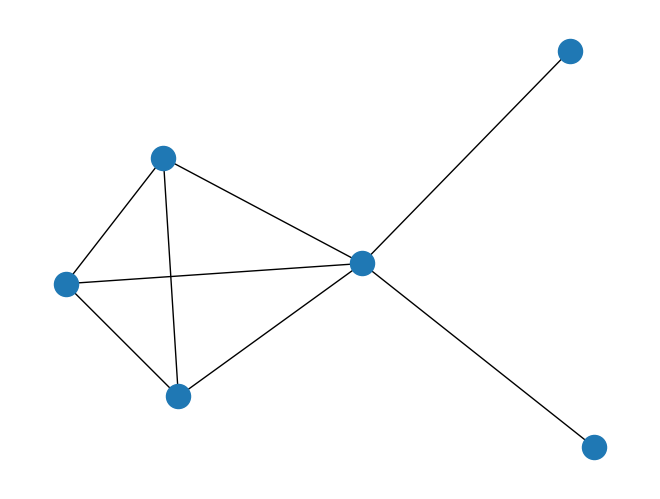

In [6]:
graph_type = nx.Graph()
df = pd.read_csv('../data/graph.csv')
G = nx.from_pandas_edgelist(df, create_using=graph_type)

nx.draw(G)
plt.show()

<div class="alert alert-block alert-warning">
<b>CAUTION:</b> This kind of graph creation is great and fast for smaller datasets. If your dataset becomes too large, you can run into memory issues.
</div>

### Adding nodes and edges

All NetworkX graph classes allow hashable Python objects (except `None`) as nodes. Hashable objects include a text string, an image, an XML object, another Graph, a customized node object, and more. **Nodes** can be added and manipulated by using the following methods:

- `G.add_node(node)` - add a single node to graph `G`
- `G.add_nodes_from(nodes)` - add nodes from container of nodes to graph `G`
- `G.remove_node(node)` - remove node from all adjacent edges from graph `G`
- `G.remove_nodes_from(nodes)` - remove nodes from container of nodes from graph `G`

**Edges** often have data associated with them. Any Python object can be assigned as an edge attribute. Edges can be added and manipulated by using the following methods:

- `G.add_edge(u, v)` - add edge between nodes `u` and `v` in graph `G`
- `G.add_edges_from(ebunch)` - add edges from the container of edges to graph `G`
- `G.add_weighted_edges_from(ebunch)` - add weighted edges from the container of edges to graph `G`
- `G.remove_edge(u, v)` - remove edge between nodes `u` and `v` from graph `G`
- `G.remove_edges_from(ebunch)` - remove edges from list or container of edge tuples from graph `G`

Check out the usage of the above procedures in the following example.

The following Python code shows how to add one or multiple nodes and edges. It will also draw a graph with Matplotlib library.

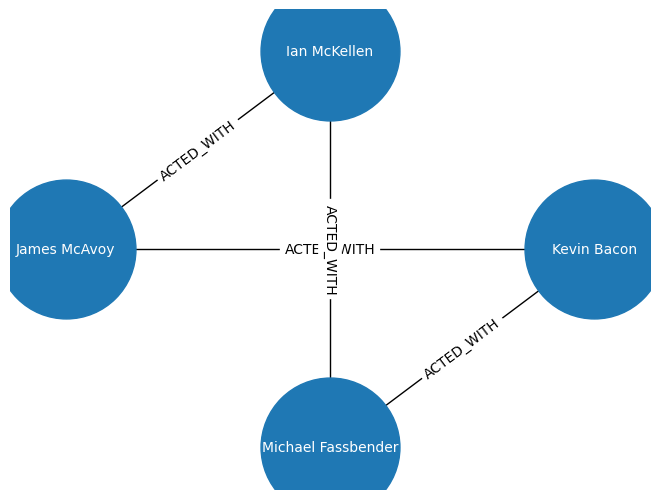

In [7]:
g = nx.Graph()

# Adding one node
g.add_node("1", label="Person", name="Kevin Bacon", age=64)

# Adding multiple nodes
g.add_nodes_from(
    [
        ("2", {"label": "Person", "name": "Ian McKellen", "age": 83}),
        ("3", {"label": "Person", "name": "James McAvoy", "age": 43}),
        ("4", {"label": "Person", "name": "Michael Fassbender", "age": 45}),
    ]
)

# Adding one edge
g.add_edge("1", "3", type="ACTED_WITH")

# Adding multiple edges
g.add_edges_from([("1", "4"), ("2", "3"), ("2", "4")], type="ACTED_WITH")

# Graph drawing
pos = nx.circular_layout(g)
nx.draw(g, pos, node_size=10000)

labels = nx.get_node_attributes(g, "name")
edge_labels = nx.get_edge_attributes(g, "type")

nx.draw_networkx_labels(g, pos, labels=labels, font_size=10, font_color="white")
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_size=10)

plt.show()

<div class="alert alert-block alert-warning">
<b>MEMORY ISSUES:</b> This kind of graph creation is great and fast for smaller datasets. If your dataset becomes too large, you can run into memory issues.
</div>

### Removing nodes and edges from the graph

The following methods are used to remove nodes and edges:

- `Graph.remove_node()`
- `Graph.remove_nodes_from()`
- `Graph.remove_edge()`
- `Graph.remove_edges_from()`

Check out the usage of the above procedures in the following example.

The following Python code shows how to remove one or multiple nodes and edges.

In [8]:
g = nx.Graph()
g.add_nodes_from([1, 2, 3, 4, 5, 6])
g.add_edges_from([(1, 2), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)])
print(g.nodes)
print(g.edges)

g.remove_node(1)
print(g.nodes)
print(g.edges)

g.remove_nodes_from([2, 3])
print(g.nodes)
print(g.edges)

g.remove_edges_from([(4, 5), (4, 6)])
print(g.nodes)
print(g.edges)

[1, 2, 3, 4, 5, 6]
[(1, 2), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)]
[2, 3, 4, 5, 6]
[(2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)]
[4, 5, 6]
[(4, 5), (4, 6), (5, 6)]
[4, 5, 6]
[(5, 6)]


## Graph examination

Let's define a simple graph `G`.

In [9]:
g = nx.Graph()
g.add_nodes_from([1, 2, 3, 4, 5, 6])
g.add_edges_from([(1, 2), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)])

To list the nodes and edges in the graph use the following code:

In [10]:
print(G.nodes)
print(G.edges)

[1, 2, 3, 4, 5, 6]
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (3, 4)]


To check out its number of nodes or edges, use the `number_of_nodes()` and `number_of_edges()` methods.

In [11]:
print(G.number_of_nodes())
print(G.number_of_edges())

6
8


To check degrees of a set of nodes, that is, with how many edges those nodes are incident with, use `G.degree()` method.

In [12]:
print(G.degree([4, 5]))

[(4, 3), (5, 1)]


## Writing graphs

NetworkX graph can be exported from many different sources and file formats: Adjacency List, Multiline Adjacency List, Edge List, GEXF, GML, Pickle, GraphML, JSON, LEDA, SparseGraph6, Pajek, GIS Shapefile and Matrix Market.

In the below example you can see how to export graph into three different file formats - Adjacency List and GML.

In [15]:
G = nx.petersen_graph()

nx.write_adjlist(G, "../data/graph_generated.adjlist")
nx.write_gml(G, "../data/graph_generated.gml")
nx.write_graphml(G, "../data/graph_generated.graphml")

<div class="alert alert-block alert-warning">
<b>PERFORMANCE LOSS:</b> This NetworkX feature is often being used when a lot of time is wasted on the graph loading each time you want to analyze the graph. This happens because NetworkX has to load graph in memory on each run.
</div>

# Functions overview



## Graph functions

| Function                                                     | Description                                                  |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| `degree(G, nbunch, weight)` | Returns a degree view of single node or of nbunch of nodes.  |
| `degree_histogram(G)` | Returns a list of the frequency of each degree value.        |
| `density(G)` | Returns the density of a graph.                              |
| `create_empty_copy(G, with_data)` | Returns a copy of the graph G with all of the edges removed. |
| `is_directed(G)` | Return True if graph is directed.                            |
| `to_directed(graph)` | Returns a directed view of the graph graph.                  |
| `to_undirected(graph)` | Returns an undirected view of the graph graph.               |
| `is_empty(G)` | Returns True if G has no edges.                              |
| `add_star(G_to_add_to, nodes_for_star, **attr)` | Add a star to Graph G_to_add_to.                             |
| `add_path(G_to_add_to, nodes_for_path, **attr)` | Add a path to the Graph G_to_add_to.                         |
| `add_cycle(G_to_add_to, nodes_for_cycle, **attr)` | Add a cycle to the Graph G_to_add_to.                        |
| `subgraph(G, nbunch)` | Returns the subgraph induced on nodes in nbunch.             |
| `subgraph_view(G, filter_node, filter_edge)` | View of G applying a filter on nodes and edges.              |
| `induced_subgraph(G, nbunch)` | Returns a SubGraph view of G showing only nodes in nbunch.   |
| `restricted_view(G, nodes, edges)` | Returns a view of G with hidden nodes and edges.             |
| `reverse_view(G)` | View of G with edge directions reversed.                     |
| `edge_subgraph(G, edges)` | Returns a view of the subgraph induced by the specified edges. |

## Node functions

| Function                                                     | Description                                           |
| ------------------------------------------------------------ | ----------------------------------------------------- |
| `nodes(G)` | Returns an iterator over the graph nodes.             |
| `number_of_nodes(G)` | Returns the number of nodes in the graph.             |
| `neighbors(G, n)` | Returns a list of nodes connected to node n.          |
| `all_neighbors(graph, node)` | Returns all of the neighbors of a node in the graph.  |
| `non_neighbors(graph, node)` | Returns the non-neighbors of the node in the graph.   |
| `common_neighbors(G, u, v)` | Returns the common neighbors of two nodes in a graph. |

## Edge functions

| Function                                                     | Description                                                |
| ------------------------------------------------------------ | ---------------------------------------------------------- |
| `edges(G, nbunch)` | Returns an edge view of edges incident to nodes in nbunch. |
| `number_of_edges(G)` | Returns the number of edges in the graph.                  |
| `density(G)` | Returns the density of a graph.                            |
| `non_edges(G)` | Returns the non-existent edges in the graph.               |

## Self loop functions

| Function                                                     | Description                                     |
| ------------------------------------------------------------ | ----------------------------------------------- |
| `selfloop_edges(G, data, keys, default)` | Returns an iterator over selfloop edges.        |
| `number_of_selfloops(G)` | Returns the number of selfloop edges.           |
| `nodes_with_selfloops(G)` | Returns an iterator over nodes with self loops. |

## Attribute functions

| Function                                                     | Description                                                  |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| `is_weighted(G, edge, weight)` | Returns True if G has weighted edges.                        |
| `is_negatively_weighted(G, edge, weight)` | Returns True if G has negatively weighted edges.             |
| `set_node_attributes(G, values, name)` | Sets node attributes from a given value or dictionary of values. |
| `get_node_attributes(G, name)` | Get node attributes from graph.                              |
| `set_edge_attributes(G, values, name)` | Sets edge attributes from a given value or dictionary of values. |
| `get_edge_attributes(G, name)` | Get edge attributes from graph.                              |

## Path functions

| Function                                                     | Description                                                  |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| `is_path(G, path)`] | Returns whether or not the specified path exists.            |
| `path_weight(G, path, weight)` | Returns total cost associated with specified path and weight. |

## Freezing graph structure functions

| Function                                                     | Description                                                  |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| `freeze(G)` | Modify graph to prevent further change by adding or removing nodes or edges. |
| `is_frozen(G)` | Returns True if graph is frozen.                             |



# Attribute basics

## How to store and access node attributes using NetworkX in Python?

You can add attributes when adding the nodes to the graph:

In [31]:
G1 = nx.Graph()

G1.add_node('Person', name='Anna', year_of_birth='1990')

Attributes can also be added as a dictionary:

In [32]:
# G2 = nx.Graph()

# G2.add_node('Person', {'name': 'Anna', 'year_of_birth': '1990'})

You can access the attributes just as you would access any dictionary in Python:

In [33]:
print(G1.nodes['Person']['name'])
print(G1.nodes['Person']['year_of_birth'])

Anna
1990


## How to access and change attributes of connected nodes?

We can use the `G.edges()` function to get all the edges of a graph and iterate over them. We need to set `data=True` to access the attributes.

In [34]:
for n1, n2 in list(G1.edges(data=True)):
    print(G1.nodes[n1]['name'], G1.nodes[n2]['name'])
    print(G1.nodes[n1]['year_of_birth'], G1.nodes[n2]['year_of_birth'])